In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)

In [3]:
dataset =  keras.datasets.cifar10.load_data()

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = dataset

In [5]:
X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_val = X_train_full[:5000]
y_val = y_train_full[:5000]

In [6]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for i in range(20):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [7]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [8]:
run_index = 1
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))

In [9]:
tb_cb = keras.callbacks.TensorBoard(run_logdir)
cp_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
es_cb = keras.callbacks.EarlyStopping(patience=20)

In [10]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[tb_cb, cp_cb, es_cb])

Epoch 1/100
1407/1407 [==============================] - 14s 8ms/step - loss: 4.1307 - accuracy: 0.1760 - val_loss: 2.1629 - val_accuracy: 0.2166
Epoch 2/100
1407/1407 [==============================] - 11s 8ms/step - loss: 2.0330 - accuracy: 0.2531 - val_loss: 2.0325 - val_accuracy: 0.2436
Epoch 3/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.9243 - accuracy: 0.2901 - val_loss: 1.9423 - val_accuracy: 0.2888
Epoch 4/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.8517 - accuracy: 0.3213 - val_loss: 1.9690 - val_accuracy: 0.2928
Epoch 5/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.7867 - accuracy: 0.3462 - val_loss: 1.7983 - val_accuracy: 0.3424
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.7379 - accuracy: 0.3694 - val_loss: 1.7342 - val_accuracy: 0.3660
Epoch 7/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6966 - accuracy: 0.3849 - val_loss: 1.6840 -

In [11]:
model_01 = keras.models.load_model("my_cifar10_model.h5")

In [12]:
model_01.evaluate(X_val, y_val)

157/157 [==============================] - 0s 2ms/step - loss: 1.4906 - accuracy: 0.4730


[1.4906166791915894, 0.4729999899864197]

In [13]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [14]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[32,32,3]))
model.add(keras.layers.BatchNormalization())

for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))

model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [16]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_cb_model.h5",save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [17]:
history = model.fit(X_train, y_train, epochs=100, 
                   validation_data=(X_val, y_val),
                   callbacks=[checkpoint_cb,early_stopping_cb,tensorboard_cb])

Epoch 1/100
1407/1407 [==============================] - 23s 12ms/step - loss: 1.8388 - accuracy: 0.3412 - val_loss: 1.6662 - val_accuracy: 0.3978
Epoch 2/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.6642 - accuracy: 0.4085 - val_loss: 1.5766 - val_accuracy: 0.4418
Epoch 3/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5948 - accuracy: 0.4326 - val_loss: 1.5287 - val_accuracy: 0.4468
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5477 - accuracy: 0.4510 - val_loss: 1.5142 - val_accuracy: 0.4638
Epoch 5/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5041 - accuracy: 0.4665 - val_loss: 1.4390 - val_accuracy: 0.4820
Epoch 6/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4670 - accuracy: 0.4802 - val_loss: 1.4285 - val_accuracy: 0.4892
Epoch 7/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4320 - accuracy: 0.4906 - val_loss: 1

In [18]:
model.evaluate(X_val, y_val)

157/157 [==============================] - 0s 3ms/step - loss: 1.3567 - accuracy: 0.5414


[1.356709599494934, 0.5414000153541565]

In [19]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [20]:
pixel_mean = np.mean(X_train, axis=0, keepdims=True)
pixel_std = np.std(X_train, axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_mean) / pixel_std
X_test_scaled = (X_test - pixel_mean) / pixel_std
X_val_scaled = (X_val - pixel_mean) / pixel_std

In [21]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [22]:
optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=optimizer, 
              metrics=["accuracy"])

In [23]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

history = model.fit(X_train_scaled, y_train, 
                    epochs=100,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 14s 9ms/step - loss: 1.9145 - accuracy: 0.3093 - val_loss: 1.7808 - val_accuracy: 0.3590
Epoch 2/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.6957 - accuracy: 0.3980 - val_loss: 1.7935 - val_accuracy: 0.3508
Epoch 3/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6009 - accuracy: 0.4337 - val_loss: 1.6514 - val_accuracy: 0.4242
Epoch 4/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5388 - accuracy: 0.4596 - val_loss: 1.6812 - val_accuracy: 0.4086
Epoch 5/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.4869 - accuracy: 0.4779 - val_loss: 1.6583 - val_accuracy: 0.4306
Epoch 6/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4357 - accuracy: 0.4978 - val_loss: 1.5328 - val_accuracy: 0.4608
Epoch 7/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.3978 - accuracy: 0.5096 - val_loss: 1.5399 -

In [24]:
model.evaluate(X_val_scaled, y_val)

157/157 [==============================] - 0s 2ms/step - loss: 1.6132 - accuracy: 0.4986


[1.6131893396377563, 0.4986000061035156]

In [25]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [26]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

In [27]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [28]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_adropout_model.h5", save_best_only=True)
callbacks = [early_stopping_cb, checkpoint_cb]
history = model.fit(X_train_scaled, y_train, 
                   epochs=100,
                   validation_data=(X_val_scaled, y_val),
                   callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 14s 8ms/step - loss: 1.9004 - accuracy: 0.3255 - val_loss: 1.7892 - val_accuracy: 0.3836
Epoch 2/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6715 - accuracy: 0.4092 - val_loss: 1.6773 - val_accuracy: 0.4144
Epoch 3/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5782 - accuracy: 0.4451 - val_loss: 1.6189 - val_accuracy: 0.4338
Epoch 4/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5146 - accuracy: 0.4680 - val_loss: 1.5944 - val_accuracy: 0.4490
Epoch 5/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4566 - accuracy: 0.4909 - val_loss: 1.6150 - val_accuracy: 0.4480
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4126 - accuracy: 0.5078 - val_loss: 1.5146 - val_accuracy: 0.4780
Epoch 7/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3624 - accuracy: 0.5256 - val_loss: 1.5519 -

In [29]:
model.evaluate(X_val_scaled, y_val)

157/157 [==============================] - 0s 2ms/step - loss: 1.8542 - accuracy: 0.5056


[1.8542146682739258, 0.5055999755859375]

In [30]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [31]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [32]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [33]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_val_scaled)
accuracy = np.mean(y_pred == y_val[:, 0])
accuracy

157/157 [==============================] - 0s 2ms/step


0.5058

In [34]:
def mc_dropout_predict_probas(model, X, n_samples=10):
    y_probas = [model.predict(X) for _ in range(n_samples)]
    return np.mean(y_probas, axis=0)
def mc_dropout_predict_classes(model, X, n_samples=10):
    y_probas = mc_dropout_predict_probas(model, X, n_samples)
    return np.argmax(y_probas, axis=1)

In [35]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [36]:
y_pred = mc_dropout_predict_classes(mc_model, X_val_scaled)

157/157 [==============================] - 0s 2ms/step


In [37]:
accuracy = np.mean(y_pred == y_val[:, 0])
accuracy
y_val[:, 0]

array([6, 9, 9, ..., 5, 4, 6], dtype=uint8)

In [38]:
import math
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [39]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [40]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu", 
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=optimizer, 
              metrics=["accuracy"])

352/352 [==============================] - 4s 9ms/step - loss: nan - accuracy: 0.1451


(9.999999747378752e-06,
 9.615227699279785,
 2.581674575805664,
 3.883039270128523)

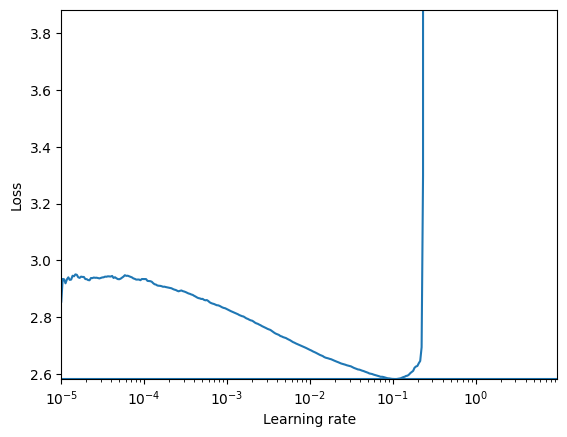

In [41]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses),(losses[0] + min(losses)) / 1.4])

In [43]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [44]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [45]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=optimizer, 
              metrics=["accuracy"])

In [47]:
n_epochs = 15
one_cycle_cb = OneCycleScheduler(math.ceil(len(X_train_scaled) / batch_size) * n_epochs, max_rate=0.05)

history = model.fit(X_train_scaled, y_train, 
                    epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_val_scaled, y_val), 
                    callbacks=[one_cycle_cb])

Epoch 1/15
352/352 [==============================] - 4s 10ms/step - loss: 2.0681 - accuracy: 0.2820 - val_loss: 1.7649 - val_accuracy: 0.3724
Epoch 2/15
352/352 [==============================] - 3s 9ms/step - loss: 1.7472 - accuracy: 0.3773 - val_loss: 1.6514 - val_accuracy: 0.4128
Epoch 3/15
352/352 [==============================] - 3s 9ms/step - loss: 1.6215 - accuracy: 0.4213 - val_loss: 1.6351 - val_accuracy: 0.4282
Epoch 4/15
352/352 [==============================] - 3s 9ms/step - loss: 1.5524 - accuracy: 0.4484 - val_loss: 1.6113 - val_accuracy: 0.4364
Epoch 5/15
352/352 [==============================] - 3s 9ms/step - loss: 1.5063 - accuracy: 0.4664 - val_loss: 1.6787 - val_accuracy: 0.4342
Epoch 6/15
352/352 [==============================] - 3s 9ms/step - loss: 1.4676 - accuracy: 0.4784 - val_loss: 1.5594 - val_accuracy: 0.4568
Epoch 7/15
352/352 [==============================] - 3s 9ms/step - loss: 1.4296 - accuracy: 0.4923 - val_loss: 1.5865 - val_accuracy: 0.4482
Epoch